## Baysian approach to estimating the time between Bus arrivals

In this excercise we assume there is a fixed interval between bus arrivals.  Due to poor planning you show up a the stop and you measure the time you wait.  Your arrival time is always random.   We will explore the difference between the maximum liklohood estimate (eg frequentist, no priors) and the maximum a posteriori (MAP) which includes a scale invariant prior.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

below we use the ML and MAP estiamte from the [slides](https://docs.google.com/presentation/d/1FTEVbEqHNtwJrQOwbmi6nMGR4_d5U5lBMbbybpsi_pE/edit?slide=id.g3bcaac62f26_0_64#slide=id.g3bcaac62f26_0_64)

In [4]:
x = int(np.random.random()*100)  ## making it an integer to make it easier to read
print("observed time: ",x, ", ML estimate: ", x,", MAP estimate: ", 2*x, ", truth = 100")

observed time:  99 , ML estimate:  99 , MAP estimate:  198 , truth = 100


run this a few times.  What do you notice about the ML vs MAP esitmates?


Next generate a distribtion of say 100 trials.  see how the ML and MAP estiamtes scatter aroound the true value.  

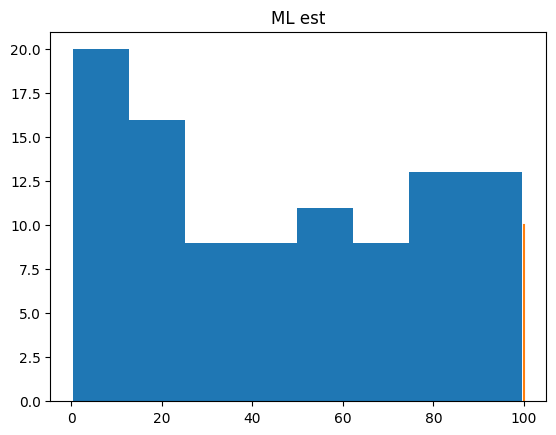

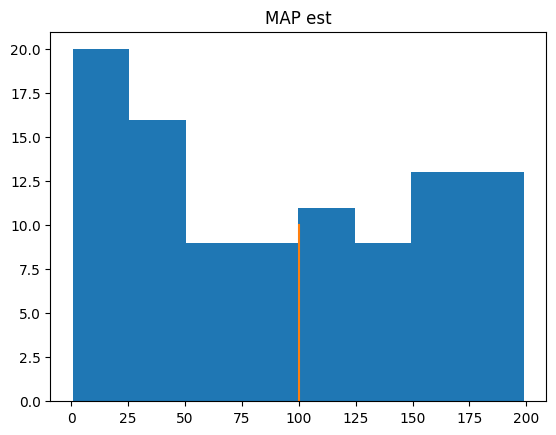

In [72]:
N_trials = 100

t = (np.random.random(N_trials)*100)

ML = t
MAP = 2*t

plt.hist(ML,bins = 'auto')
plt.title("ML est")
plt.plot(np.array([100,100]),np.array([0,10]))
plt.show()
plt.hist(MAP,bins = 'auto')
plt.title("MAP est")
plt.plot(np.array([100,100]),np.array([0,10]))
plt.show()


What do you notice?    Which is more reliable?   Do you think priors are important?   If you didn't have a prior could you get this right?   What would you have to do?


## computign the liklihood and the posterior for many trials 

Below is code that computes the  Posterior for the samples we computed above assuming the scale invariant prior.  Note how it is constructed. 

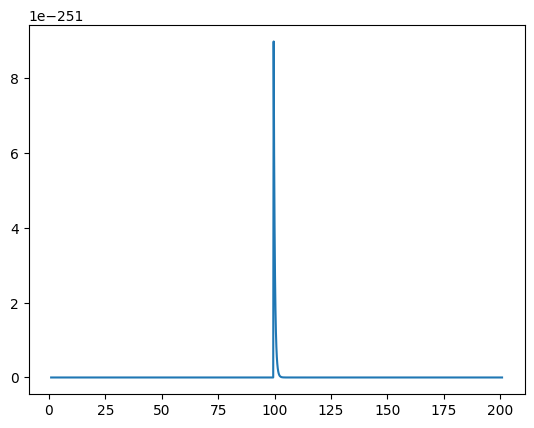

In [92]:
def Lbus(tau,t):
    i = 0
    out  = 1 
    while (i < np.size(t)):
        if (t[i] > tau):
            temp = 0
        else :
            temp = t[i] / tau**2
        out*=temp
        i+=1
    return(out)


N = 200*5
tau = (np.arange(N)+5)/5

L = np.zeros(N)

i = 0
while (i < N):
    L[i] = Lbus(tau[i],t)
    i+=1


plt.plot(tau,L)

## excercise 
change to the flat prior.  If you do this do you expect to get the correct result?   Do you get the correct result?  what do you notice about the difference.


## excercise
compute the 90% credible interval from the posterior comuted wiht a scale invarinant prior

In [95]:
## work goes here

## Model Selection 

below is a liklhood assuming this is an exponential process with a scale invariant prior. (Does the prior make a difference?) compute the odds ratio for N= 10 and N = 1000.   Which model fits the data better?


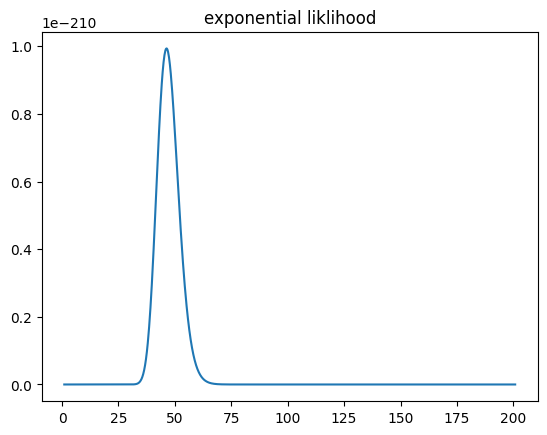

In [98]:
def Lexp(tau,t):
    i = 0
    out  = 1 
    while (i < np.size(t)):
        temp = np.exp(-t[i]/tau) / tau 
        out*=temp
        i+=1
    return(out)


LBexp = np.zeros(N)

i = 0
while (i < N):
    LBexp[i] = Lexp(tau[i],t)
    i+=1


plt.plot(tau,LBexp)
plt.title("exponential liklihood")
plt.show()

In [100]:
LBexp /= np.sum(LBexp)
L/= np.sum(L)


19.33329277106795


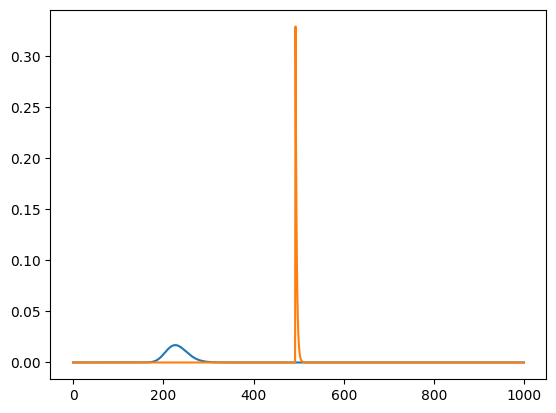

In [102]:
## you have to normalize the liklihood before doing the test...
## note the issue with resolution.. 
### if yuo don't resolve the peak you can't do the normalizaiotn propertly
plt.plot(LBexp)
plt.plot(L)
print(np.max(L) / np.max(LBexp))

## additional paramters

if you add extra paramters to the liklohood you tend to smear out the probability which reduces the peak after normalization.  Thus if the paramter is extraneous the liklihood ratio will disfavor that extra paramater.  However, if the fit improves the test will refelct that.